<div align="center">
  <h2>Міністерство освіти і науки України</h2>
  <h2>Національний технічний університет України</h2>
  <h2>«Київський політехнічний інститут ім. Ігоря Сікорського»</h2>
  <h2>Факультет інформатики та обчислювальної техніки</h2>
  <h2>Кафедра обчислювальної техніки</h2>
  <br>
</div>

<div align="right">
    <br>
    <br>
<center>    
<h2>Лабораторна робота №5</h2>
</center>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
Виконав: <br>
Студент ІІ курсу ФІОТ <br>
групи ІО-34 <br>
Рибачок Михайло Володимирович <br>
Номер у списку - 17 <br><br>

<center>
Київ - 2025
</center>

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dev0914sharma/customer-clustering")

print("Path to dataset files:", path)

100%|██████████| 25.9k/25.9k [00:00<00:00, 981kB/s]

Extracting files...
Path to dataset files: C:\Users\Mishanya\.cache\kagglehub\datasets\dev0914sharma\customer-clustering\versions\1


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
data_customer = pd.read_csv("segmentation data.csv")
data_customer.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')

y_kmeans = kmeans.fit_predict(data_customer)
y_kmeans=pd.DataFrame(y_kmeans)
data_customer['Cluster']= pd.DataFrame(y_kmeans)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,3
2,100000003,0,0,49,1,89210,0,0,2
3,100000004,0,0,45,1,171565,1,1,3
4,100000005,0,0,53,1,149031,1,1,3


In [28]:
from sklearn.preprocessing import StandardScaler


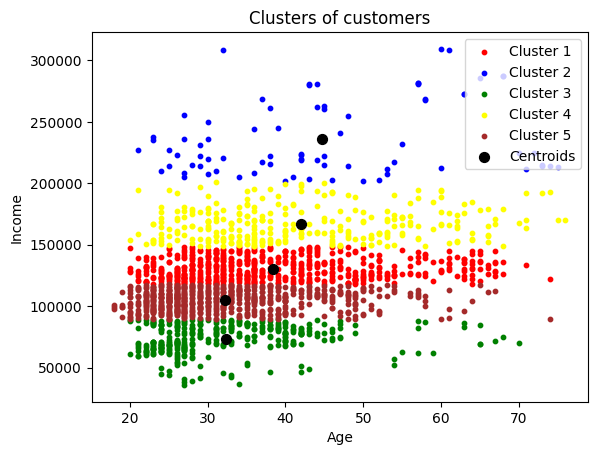

In [38]:

# Використаємо тільки потрібні колонки для кластеризації
X = data_customer[['Age', 'Income']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Додаємо результат у датафрейм
data_customer['Cluster'] = y_kmeans

# Малюємо кластери
for i, color in enumerate(['red', 'blue', 'green', 'yellow', 'brown']):
    plt.scatter(X.loc[data_customer['Cluster'] == i, 'Age'],
                X.loc[data_customer['Cluster'] == i, 'Income'],
                s=10, c=color, label=f'Cluster {i+1}')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            s=50, c='black', marker='o', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()